## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data preprocessing

### Training Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [3]:
### Validation Image Processing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [5]:
training_set

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
for x, y in training_set:
    print(x,x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[200.5  176.5  172.5 ]
   [209.25 185.25 181.25]
   [209.75 185.75 181.75]
   ...
   [219.   193.   192.  ]
   [206.   180.   179.  ]
   [202.   176.   175.  ]]

  [[210.25 186.25 182.25]
   [204.   180.   176.  ]
   [207.75 183.75 179.75]
   ...
   [195.25 169.25 168.25]
   [203.5  177.5  176.5 ]
   [220.   194.   193.  ]]

  [[215.25 191.25 187.25]
   [213.5  189.5  185.5 ]
   [214.25 190.25 186.25]
   ...
   [212.25 186.25 185.25]
   [214.25 188.25 187.25]
   [222.75 196.75 195.75]]

  ...

  [[ 46.75  49.    60.25]
   [ 52.25  54.5   65.75]
   [ 47.75  49.75  61.75]
   ...
   [230.   212.   210.  ]
   [239.75 222.75 220.75]
   [216.5  198.5  196.5 ]]

  [[ 47.25  47.25  55.75]
   [ 52.    52.    60.5 ]
   [ 50.25  50.25  59.25]
   ...
   [222.25 204.25 202.25]
   [236.5  218.75 216.75]
   [219.   201.   199.  ]]

  [[ 48.5   47.5   53.5 ]
   [ 50.    49.    55.  ]
   [ 50.    49.    55.  ]
   ...
   [229.75 211.75 209.75]
   [228.5  210.5  208.5 ]
   [227.   209.   20

## Building Model
##### https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks

In [7]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [8]:
model = tf.keras.models.Sequential()
cnn = tf.keras.models.Sequential()

## Building convolution layer

In [9]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [10]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu')) #removed padding to increase training speed
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [11]:
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [12]:
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [13]:
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Added more filters (512) to capture more features on the imgae

In [14]:
model.add(Dropout(0.25)) #To avoid overfitting

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1500, activation='relu')) # Increase the number of neurons from 1024 to 1500 to avoid overfitting

In [17]:
model.add(Dropout(0.4))

## Output Layer

In [18]:
## Output Layer
model.add(Dense(units=38, activation='softmax'))

## Compile Model

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

## Model Training

In [22]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=3)

Epoch 1/3
2197/2197 [==============================] - 2036s 927ms/step - loss: 1.2219 - accuracy: 0.6379 - val_loss: 0.4992 - val_accuracy: 0.8442
Epoch 2/3
2197/2197 [==============================] - 2080s 947ms/step - loss: 0.4171 - accuracy: 0.8690 - val_loss: 0.3452 - val_accuracy: 0.8891
Epoch 3/3
2197/2197 [==============================] - 2080s 947ms/step - loss: 0.2543 - accuracy: 0.9184 - val_loss: 0.2369 - val_accuracy: 0.9240


## Model Evaluation

In [ ]:
#Model Evaluation on Training Set
train_loss, train_acc = model.evaluate(training_set)
print('Training Loss:',train_loss)
print('Training Accuracy:', train_acc)

2197/2197 [==============================] - 442s 201ms/step - loss: 0.1661 - accuracy: 0.9449
0.16609978675842285 0.9449320435523987


In [ ]:
# Model evaluation on the Evalution Set
val_loss, val_acc = model.evaluate(validation_set)
print(val_loss, val_acc)
print('Validation Loss:', val_loss)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 109s 197ms/step - loss: 0.2369 - accuracy: 0.9240
0.23693867027759552 0.9239699244499207


## Save Model

In [27]:
model.save("trained_model.keras")

## Visualise

In [29]:
training_history.history

{'loss': [1.2219470739364624, 0.41705355048179626, 0.25430455803871155],
 'accuracy': [0.637883186340332, 0.8689807057380676, 0.9184294939041138],
 'val_loss': [0.499156653881073, 0.3452390432357788, 0.23693867027759552],
 'val_accuracy': [0.8442408442497253, 0.8890849351882935, 0.9239699244499207]}

### Record Model history

In [31]:
import json
with open("training_hist.json", "w") as f:
    json.dump(training_history.history, f)

In [58]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### Accuracy visualisation

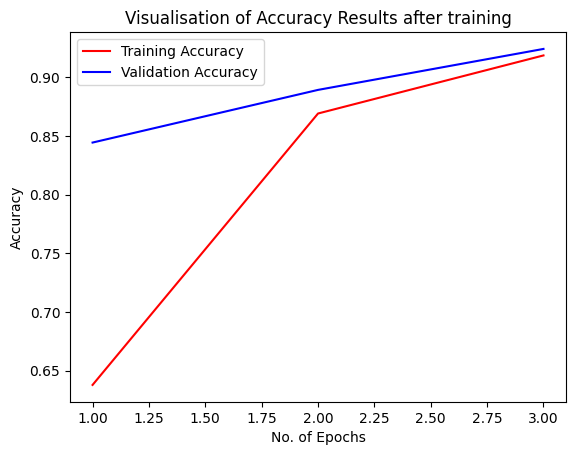

In [38]:
epochs = [i for i in range(1,4)]
plt.plot(epochs, training_history.history['accuracy'], color='red',label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Visualisation of Accuracy Results after training")
plt.legend()

### Other model evaluation metrics

In [ ]:
class_name = validation_set.class_names

In [ ]:

test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
## Prediction

y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

550/550 [==============================] - 169s 306ms/step


In [59]:

true_categories = tf.concat([y for x,y in test_set], axis=0)
y_true = tf.argmax(true_categories, axis=1)


#### Precision and Recall

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true,predicted_categories,target_names=class_name))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.90      0.94       504
                                 Apple___Black_rot       0.97      0.96      0.96       497
                          Apple___Cedar_apple_rust       0.81      1.00      0.89       440
                                   Apple___healthy       0.95      0.90      0.92       502
                               Blueberry___healthy       0.94      0.95      0.94       454
          Cherry_(including_sour)___Powdery_mildew       0.95      0.99      0.97       421
                 Cherry_(including_sour)___healthy       0.91      0.98      0.95       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.91      0.90       410
                       Corn_(maize)___Common_rust_       0.98      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.95      0.

### Confusion metrics

In [ ]:
cm = confusion_matrix(y_true, predicted_categories)
cm.shape

(38, 38)

### Confision metric visualisation

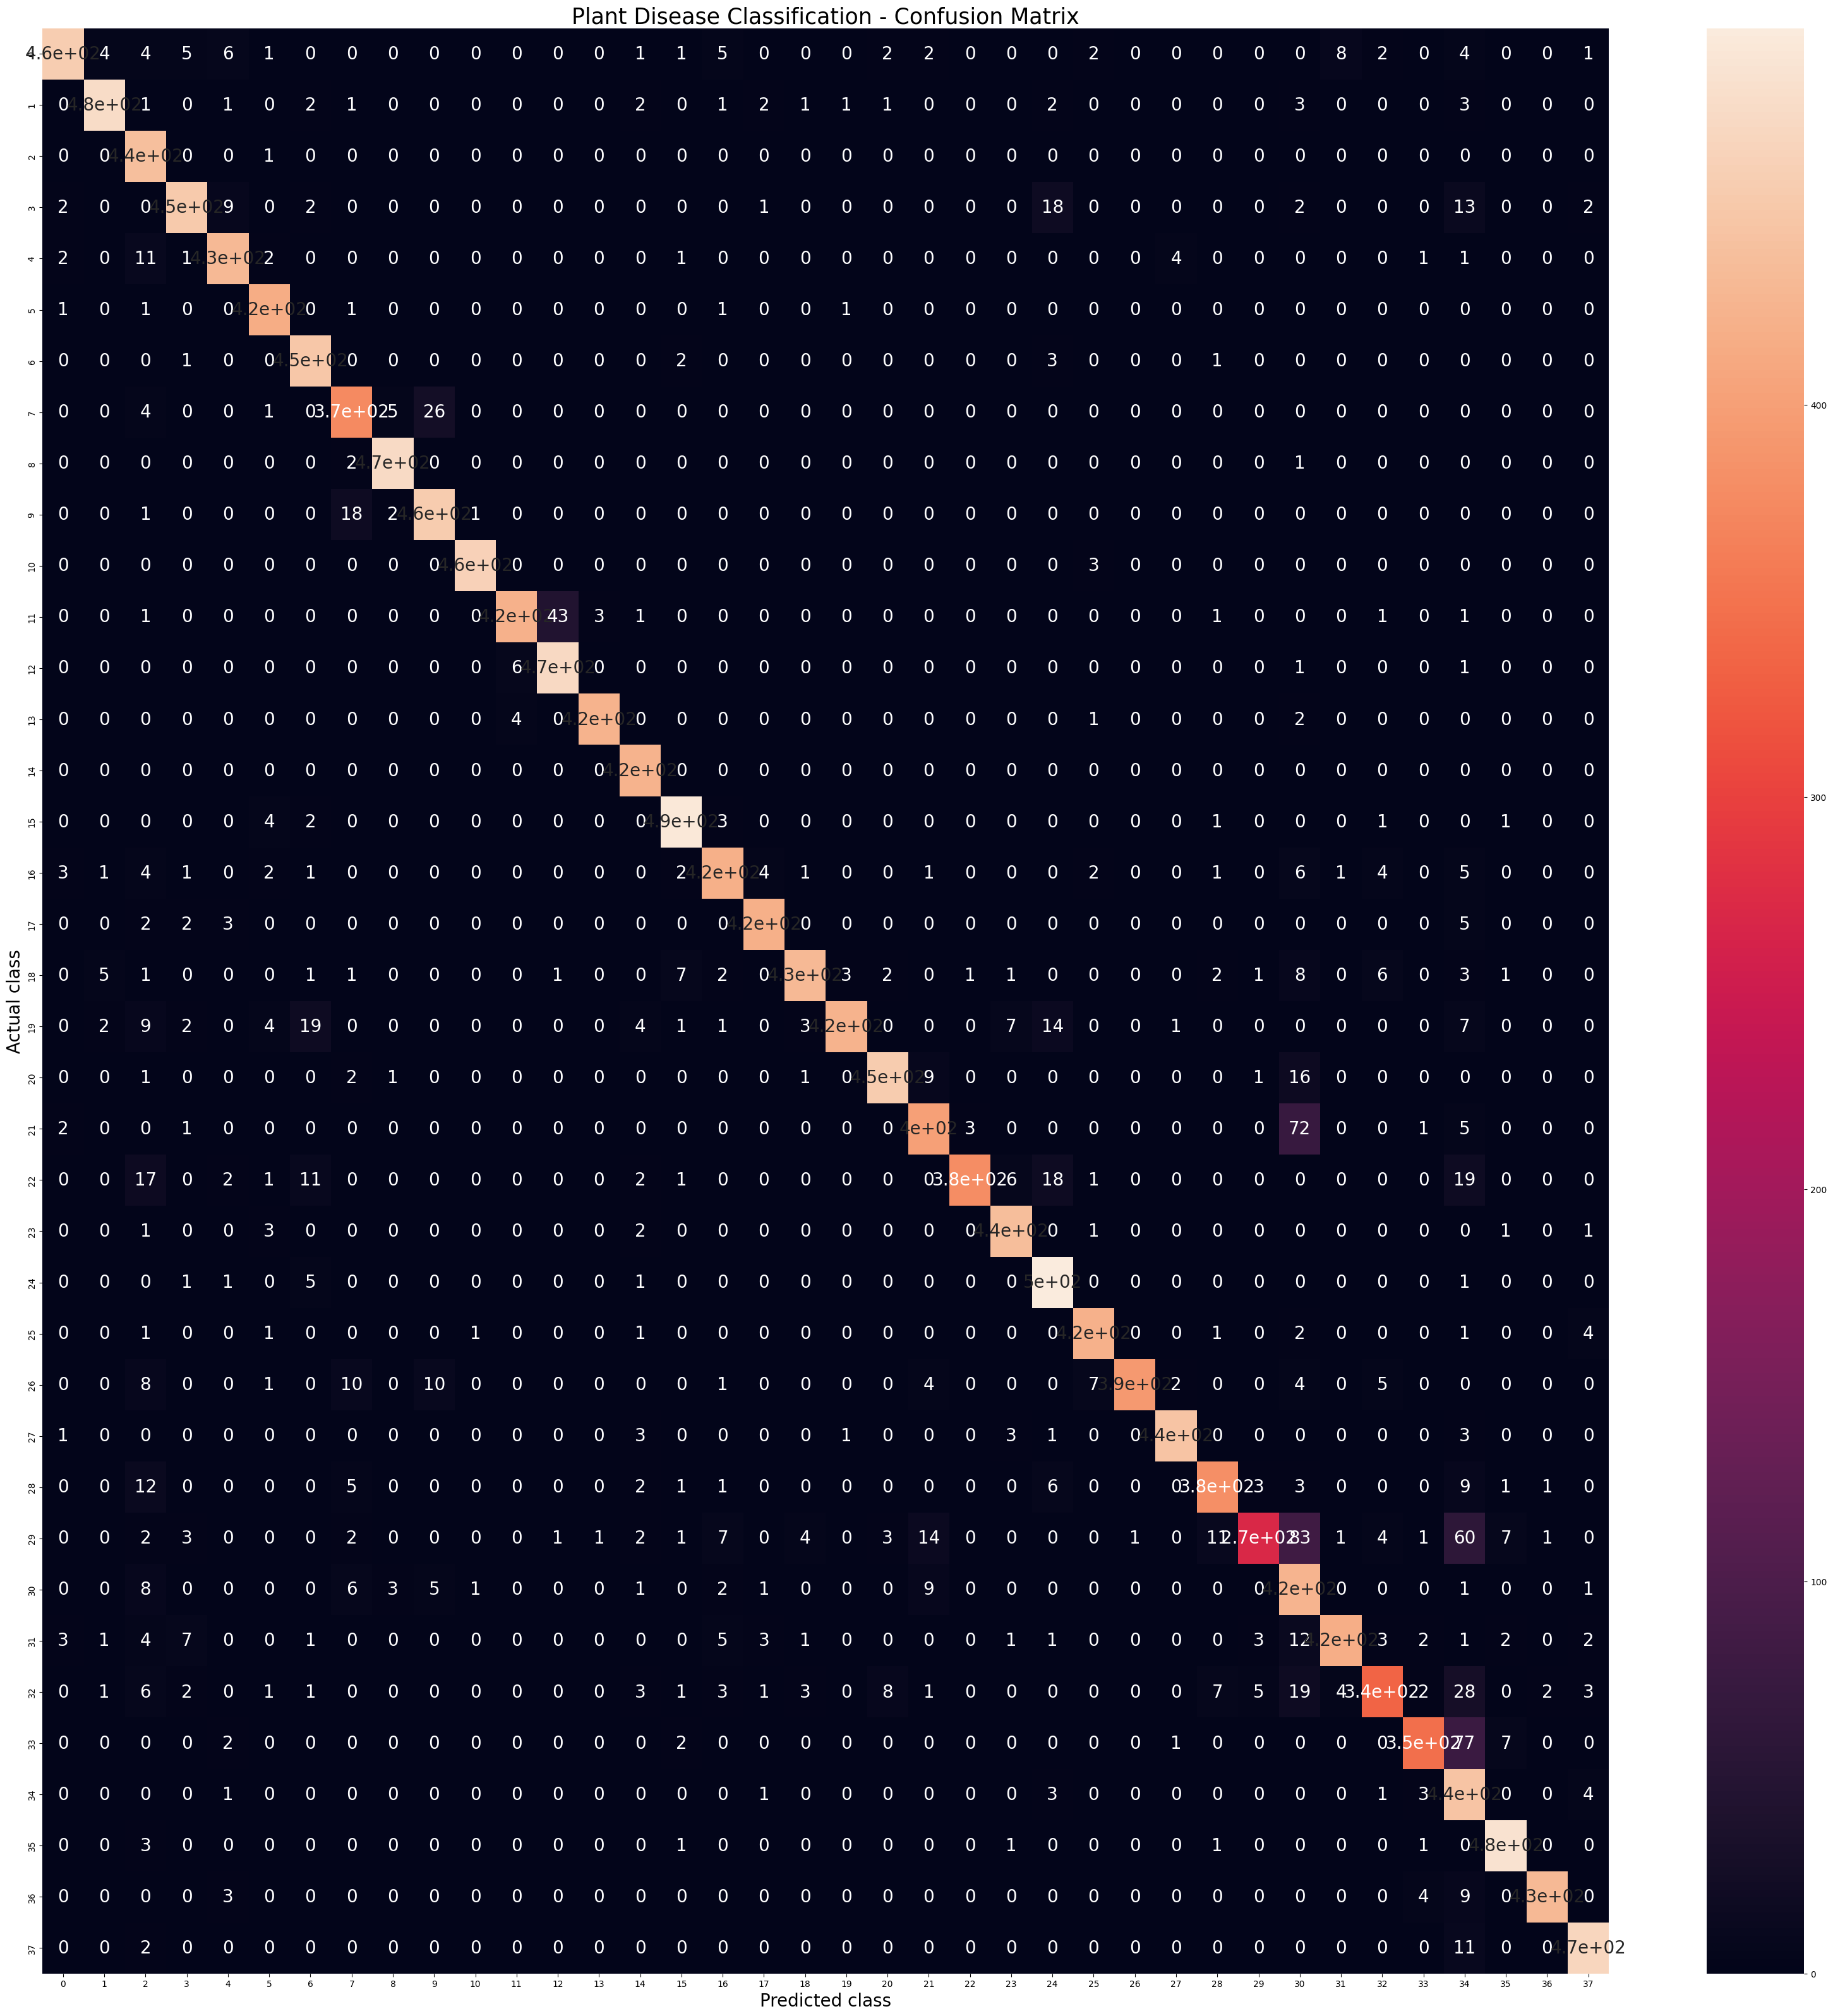

In [72]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, annot_kws={'size':20})
plt.xlabel("Predicted class", fontsize=20)
plt.ylabel("Actual class", fontsize=20)
plt.title("Plant Disease Classification - Confusion Matrix", fontsize=25)
plt.show()